## Import Libraries

In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

## Load Data

In [2]:
df = pd.read_csv('instagram.csv')
df.head()

,score,content
0,0,Sumpah filter gw yang awalnya dibagian cerita ...
1,0,Awal main instagram cuma buat nyimpen data (fo...
2,0,"G bisa Login ke akun awal, muncul kesalahan tr..."
3,0,"Reel udh di update, besokannya lagu tidak ters..."
4,0,Kecewa si...pas di update malah jadi gak bisa ...


In [3]:
df[df['score']==0].head()

,score,content
0,0,Sumpah filter gw yang awalnya dibagian cerita ...
1,0,Awal main instagram cuma buat nyimpen data (fo...
2,0,"G bisa Login ke akun awal, muncul kesalahan tr..."
3,0,"Reel udh di update, besokannya lagu tidak ters..."
4,0,Kecewa si...pas di update malah jadi gak bisa ...


In [4]:
df['content'][0]

'Sumpah filter gw yang awalnya dibagian cerita malah pindah ke reel, gw mau foto sama temen temen gw jadi ga bisa mana pas dipindahkan juga ga bisa. Tolong kali lah ya ini update nya gak berguna sama sekali malah buat makin banyak bug aja'

In [5]:
df[df['score']==1].head()

,score,content
449,1,"Filternya suka hilang sendiri, kadang juga suk..."
450,1,"Sudah bagus, tapi ada bug dimana ketika memuta..."
451,1,Kenapa yahh Instagram sekarang seting nge-bug?...
452,1,Semenjak update instagram kok saya malah gak b...
453,1,Bagus tapi satu ja yg kurang lagi..klik post g...


In [6]:
df[df['score']==0].head()

,score,content
0,0,Sumpah filter gw yang awalnya dibagian cerita ...
1,0,Awal main instagram cuma buat nyimpen data (fo...
2,0,"G bisa Login ke akun awal, muncul kesalahan tr..."
3,0,"Reel udh di update, besokannya lagu tidak ters..."
4,0,Kecewa si...pas di update malah jadi gak bisa ...


In [7]:
df['content'][453]

'Bagus tapi satu ja yg kurang lagi..klik post gambar itu knpa tidak dpt post full gambar.. kalau video dpt full habis post kebesaran video.. gambar pula tidak dpt full kebesaran gambar untuk di post harap di ubah lagi.. terima kasih'

In [8]:
# check missing values
df.isnull().sum().sort_values(ascending=False)

score      0
content    0
dtype: int64

Tidak ada missing values

## Class Distribution

0    449
1    151
Name: score, dtype: int64


AxesSubplot(0.125,0.11;0.775x0.77)


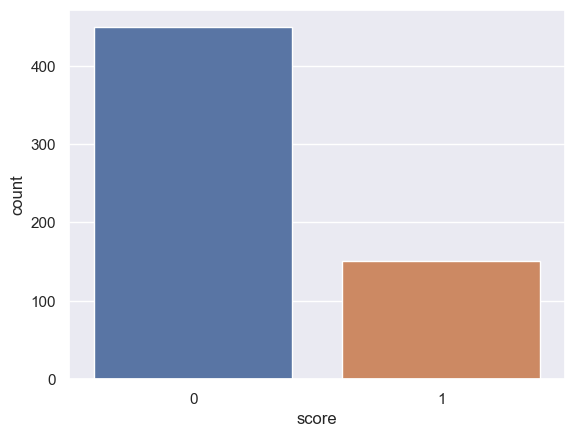

In [9]:
print(df['score'].value_counts())
print('\n')
print(sns.countplot(df['score']))

In [10]:
jum_pos = df[df['score']==0]['score'].count()
jum_neg = df[df['score']==1]['score'].count()

percent_pos = (jum_pos/(jum_pos+jum_neg)*100)
percent_neg= (jum_neg/(jum_pos+jum_pos))*100
print(percent_pos)
print(percent_neg)

74.83333333333333
16.815144766146993


In [11]:
# info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   score    600 non-null    int64 
 1   content  600 non-null    object
dtypes: int64(1), object(1)
memory usage: 9.5+ KB


In [12]:
# describe dataset
df.describe()

,score
count,600.000000
mean,0.251667
std,0.434333
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

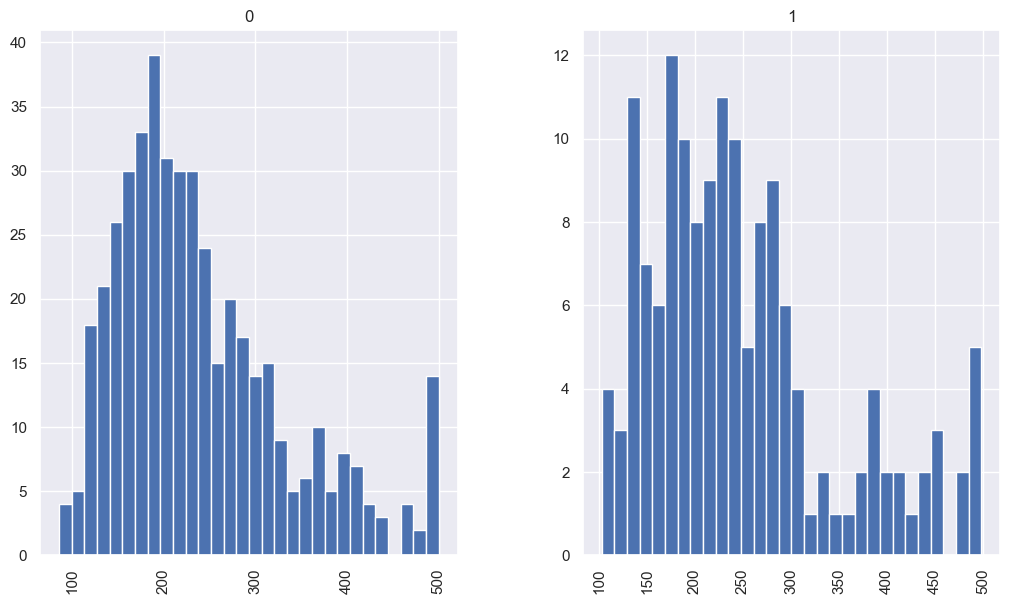

In [13]:
df['length'] = df['content'].apply(len)
df.hist(column='length', by='score', bins=30, figsize=(12,7))

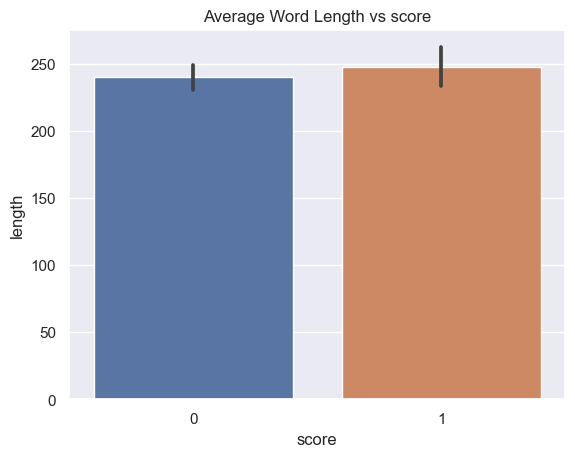

In [14]:
fig1 = sns.barplot(x='score',y='length',data = df)
plt.title('Average Word Length vs score')
plot = fig1.get_figure()

## Preprocessing

In [15]:
df_ig =df.copy()

### Case Folding

In [16]:
import re

In [17]:
def case_folding(data):
  temp_data = []

  for tw in data:
    # removal of @name[mention]
    tw = re.sub(r"(?:\@|https?\://)\S+", "", tw)

    # removal of links[https://blabala.com]
    # tw = re.sub(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", "", tw)
    tw = re.sub(r"http\S+", "", tw)

    # removal of new line
    tw = re.sub('\n', '', tw)

    # removal of RT
    tw = re.sub('RT', '', tw)

    # removal of punctuations and numbers
    tw = re.sub("[^a-zA-Z^']", " ", tw)
    tw = re.sub(" {2,}", " ", tw)

    # remove leading and trailing whitespace
    tw = tw.strip()

    # remove whitespace with a single space
    tw = re.sub(r'\s+', ' ', tw)

    # convert text to Lowercase
    tw = tw.lower();
    temp_data.append(tw)
  return temp_data

In [18]:
df_ig['Case_folded']=case_folding(df_ig['content'])
df_ig.head()

,score,content,length,Case_folded
0,0,Sumpah filter gw yang awalnya dibagian cerita ...,237,sumpah filter gw yang awalnya dibagian cerita ...
1,0,Awal main instagram cuma buat nyimpen data (fo...,281,awal main instagram cuma buat nyimpen data fot...
2,0,"G bisa Login ke akun awal, muncul kesalahan tr...",138,g bisa login ke akun awal muncul kesalahan trs...
3,0,"Reel udh di update, besokannya lagu tidak ters...",210,reel udh di update besokannya lagu tidak terse...
4,0,Kecewa si...pas di update malah jadi gak bisa ...,146,kecewa si pas di update malah jadi gak bisa lo...


0    449
1    151
Name: score, dtype: int64


AxesSubplot(0.125,0.11;0.775x0.77)


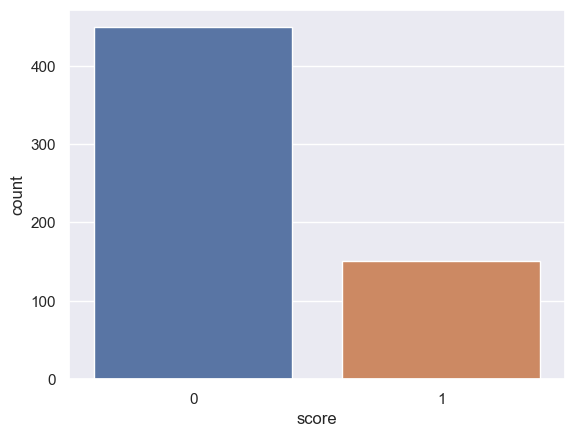

In [19]:
print(df_ig['score'].value_counts())
print('\n')
print(sns.countplot(df_ig['score']))

### Tokenize

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
def tokenized(data):
    
    return data.apply(nltk.word_tokenize)

In [22]:
df_ig['Tokenized']=tokenized(df_ig['Case_folded'])
df_ig.head()

,score,content,length,Case_folded,Tokenized
0,0,Sumpah filter gw yang awalnya dibagian cerita ...,237,sumpah filter gw yang awalnya dibagian cerita ...,"[sumpah, filter, gw, yang, awalnya, dibagian, ..."
1,0,Awal main instagram cuma buat nyimpen data (fo...,281,awal main instagram cuma buat nyimpen data fot...,"[awal, main, instagram, cuma, buat, nyimpen, d..."
2,0,"G bisa Login ke akun awal, muncul kesalahan tr...",138,g bisa login ke akun awal muncul kesalahan trs...,"[g, bisa, login, ke, akun, awal, muncul, kesal..."
3,0,"Reel udh di update, besokannya lagu tidak ters...",210,reel udh di update besokannya lagu tidak terse...,"[reel, udh, di, update, besokannya, lagu, tida..."
4,0,Kecewa si...pas di update malah jadi gak bisa ...,146,kecewa si pas di update malah jadi gak bisa lo...,"[kecewa, si, pas, di, update, malah, jadi, gak..."


In [23]:
print(df_ig['score'].value_counts())

0    449
1    151
Name: score, dtype: int64


### Stemming

In [24]:
pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [25]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [26]:
def stemming(data):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()

  return [stemmer.stem(content) for content in data]

In [27]:
df_ig['Stemmed'] = df_ig['Tokenized'].apply(stemming)
df_ig.head()

,score,content,length,Case_folded,Tokenized,Stemmed
0,0,Sumpah filter gw yang awalnya dibagian cerita ...,237,sumpah filter gw yang awalnya dibagian cerita ...,"[sumpah, filter, gw, yang, awalnya, dibagian, ...","[sumpah, filter, gw, yang, awal, bagi, cerita,..."
1,0,Awal main instagram cuma buat nyimpen data (fo...,281,awal main instagram cuma buat nyimpen data fot...,"[awal, main, instagram, cuma, buat, nyimpen, d...","[awal, main, instagram, cuma, buat, nyimpen, d..."
2,0,"G bisa Login ke akun awal, muncul kesalahan tr...",138,g bisa login ke akun awal muncul kesalahan trs...,"[g, bisa, login, ke, akun, awal, muncul, kesal...","[g, bisa, login, ke, akun, awal, muncul, salah..."
3,0,"Reel udh di update, besokannya lagu tidak ters...",210,reel udh di update besokannya lagu tidak terse...,"[reel, udh, di, update, besokannya, lagu, tida...","[reel, udh, di, update, besok, lagu, tidak, se..."
4,0,Kecewa si...pas di update malah jadi gak bisa ...,146,kecewa si pas di update malah jadi gak bisa lo...,"[kecewa, si, pas, di, update, malah, jadi, gak...","[kecewa, si, pas, di, update, malah, jadi, gak..."


### Slang Words Removal

In [28]:
import requests

In [29]:
slang_word = requests.get('https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt').text
dict_slang = eval(slang_word)

In [30]:
dict_slang.items()

dict_items([('@', 'di'), ('abis', 'habis'), ('ad', 'ada'), ('adlh', 'adalah'), ('afaik', 'as far as i know'), ('ahaha', 'haha'), ('aj', 'saja'), ('ajep-ajep', 'dunia gemerlap'), ('ak', 'saya'), ('akika', 'aku'), ('akkoh', 'aku'), ('akuwh', 'aku'), ('alay', 'norak'), ('alow', 'halo'), ('ambilin', 'ambilkan'), ('ancur', 'hancur'), ('anjrit', 'anjing'), ('anter', 'antar'), ('ap2', 'apa-apa'), ('apasih', 'apa sih'), ('apes', 'sial'), ('aps', 'apa'), ('aq', 'saya'), ('aquwh', 'aku'), ('asbun', 'asal bunyi'), ('aseekk', 'asyik'), ('asekk', 'asyik'), ('asem', 'asam'), ('aspal', 'asli tetapi palsu'), ('astul', 'asal tulis'), ('ato', 'atau'), ('au ah', 'tidak mau tahu'), ('awak', 'saya'), ('ay', 'sayang'), ('ayank', 'sayang'), ('b4', 'sebelum'), ('bakalan', 'akan'), ('bandes', 'bantuan desa'), ('bangedh', 'banget'), ('banpol', 'bantuan polisi'), ('banpur', 'bantuan tempur'), ('basbang', 'basi'), ('bcanda', 'bercanda'), ('bdg', 'bandung'), ('begajulan', 'nakal'), ('beliin', 'belikan'), ('bencong

In [31]:
slang_df_ig = pd.DataFrame(dict_slang.items(), columns=['Old', 'New'])
slang_df_ig.head()

,Old,New
0,@,di
1,abis,habis
2,ad,ada
3,adlh,adalah
4,afaik,as far as i know


In [32]:
# remove trailing white space
slang_df_ig['Old'] = slang_df_ig['Old'].apply(lambda x: x.strip())
slang_df_ig['New'] = slang_df_ig['New'].apply(lambda x: x.strip())

In [33]:
# transform into key value in a dict
slang_dict = {}
for i, row in slang_df_ig.iterrows():
  slang_dict.update({row['Old']: row['New']})

In [34]:
def removeSlang(data):
  # iterate through data
  for i, word in enumerate(data):
    # check if data in slang dictionary or not
    try:
      data[i] = slang_dict[word]
    # if data is not slang then pass
    except KeyError:
      pass
  return data

In [35]:
df_ig['No_Slang'] = df_ig['Stemmed'].apply(removeSlang)
df_ig.head()

,score,content,length,Case_folded,Tokenized,Stemmed,No_Slang
0,0,Sumpah filter gw yang awalnya dibagian cerita ...,237,sumpah filter gw yang awalnya dibagian cerita ...,"[sumpah, filter, gw, yang, awalnya, dibagian, ...","[sumpah, filter, saya, yang, awal, bagi, cerit...","[sumpah, filter, saya, yang, awal, bagi, cerit..."
1,0,Awal main instagram cuma buat nyimpen data (fo...,281,awal main instagram cuma buat nyimpen data fot...,"[awal, main, instagram, cuma, buat, nyimpen, d...","[awal, main, instagram, cuma, buat, nyimpen, d...","[awal, main, instagram, cuma, buat, nyimpen, d..."
2,0,"G bisa Login ke akun awal, muncul kesalahan tr...",138,g bisa login ke akun awal muncul kesalahan trs...,"[g, bisa, login, ke, akun, awal, muncul, kesal...","[g, bisa, login, ke, akun, awal, muncul, salah...","[g, bisa, login, ke, akun, awal, muncul, salah..."
3,0,"Reel udh di update, besokannya lagu tidak ters...",210,reel udh di update besokannya lagu tidak terse...,"[reel, udh, di, update, besokannya, lagu, tida...","[reel, udh, di, update, besok, lagu, tidak, se...","[reel, udh, di, update, besok, lagu, tidak, se..."
4,0,Kecewa si...pas di update malah jadi gak bisa ...,146,kecewa si pas di update malah jadi gak bisa lo...,"[kecewa, si, pas, di, update, malah, jadi, gak...","[kecewa, si, pas, di, update, bahkan, jadi, ga...","[kecewa, si, pas, di, update, bahkan, jadi, ga..."


0    449
1    151
Name: score, dtype: int64


AxesSubplot(0.125,0.11;0.775x0.77)


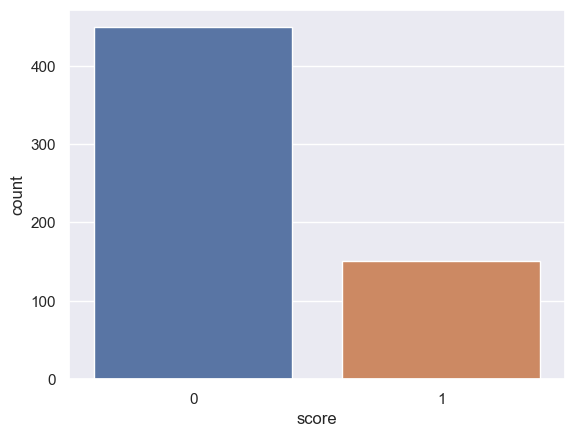

In [36]:
print(df_ig['score'].value_counts())
print('\n')
print(sns.countplot(df_ig['score']))

### Stop Words Removal

In [37]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
def removeStopWords(data):
  stop_words = set(stopwords.words('indonesian'))
  return data.apply(lambda x: [item for item in x if item not in stop_words])

In [39]:
df_ig['No_Stop']=removeStopWords(df_ig['No_Slang'])
df_ig.head()

,score,content,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop
0,0,Sumpah filter gw yang awalnya dibagian cerita ...,237,sumpah filter gw yang awalnya dibagian cerita ...,"[sumpah, filter, gw, yang, awalnya, dibagian, ...","[sumpah, filter, saya, yang, awal, bagi, cerit...","[sumpah, filter, saya, yang, awal, bagi, cerit...","[sumpah, filter, cerita, pindah, reel, foto, t..."
1,0,Awal main instagram cuma buat nyimpen data (fo...,281,awal main instagram cuma buat nyimpen data fot...,"[awal, main, instagram, cuma, buat, nyimpen, d...","[awal, main, instagram, cuma, buat, nyimpen, d...","[awal, main, instagram, cuma, buat, nyimpen, d...","[main, instagram, nyimpen, data, foto, video, ..."
2,0,"G bisa Login ke akun awal, muncul kesalahan tr...",138,g bisa login ke akun awal muncul kesalahan trs...,"[g, bisa, login, ke, akun, awal, muncul, kesal...","[g, bisa, login, ke, akun, awal, muncul, salah...","[g, bisa, login, ke, akun, awal, muncul, salah...","[g, login, akun, muncul, salah, pdhl, username..."
3,0,"Reel udh di update, besokannya lagu tidak ters...",210,reel udh di update besokannya lagu tidak terse...,"[reel, udh, di, update, besokannya, lagu, tida...","[reel, udh, di, update, besok, lagu, tidak, se...","[reel, udh, di, update, besok, lagu, tidak, se...","[reel, udh, update, besok, lagu, sedia, coba, ..."
4,0,Kecewa si...pas di update malah jadi gak bisa ...,146,kecewa si pas di update malah jadi gak bisa lo...,"[kecewa, si, pas, di, update, malah, jadi, gak...","[kecewa, si, pas, di, update, bahkan, jadi, ga...","[kecewa, si, pas, di, update, bahkan, jadi, ga...","[kecewa, si, pas, update, gak, login, akun, gk..."


In [40]:
print(df_ig['score'].value_counts())

0    449
1    151
Name: score, dtype: int64


## Encoding Target Value

In [41]:
df_ig['score'] = df_ig['score'].apply(lambda x: 'Positif' if x == 1 else 'Negatif')
df_ig.head()

,score,content,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop
0,Negatif,Sumpah filter gw yang awalnya dibagian cerita ...,237,sumpah filter gw yang awalnya dibagian cerita ...,"[sumpah, filter, gw, yang, awalnya, dibagian, ...","[sumpah, filter, saya, yang, awal, bagi, cerit...","[sumpah, filter, saya, yang, awal, bagi, cerit...","[sumpah, filter, cerita, pindah, reel, foto, t..."
1,Negatif,Awal main instagram cuma buat nyimpen data (fo...,281,awal main instagram cuma buat nyimpen data fot...,"[awal, main, instagram, cuma, buat, nyimpen, d...","[awal, main, instagram, cuma, buat, nyimpen, d...","[awal, main, instagram, cuma, buat, nyimpen, d...","[main, instagram, nyimpen, data, foto, video, ..."
2,Negatif,"G bisa Login ke akun awal, muncul kesalahan tr...",138,g bisa login ke akun awal muncul kesalahan trs...,"[g, bisa, login, ke, akun, awal, muncul, kesal...","[g, bisa, login, ke, akun, awal, muncul, salah...","[g, bisa, login, ke, akun, awal, muncul, salah...","[g, login, akun, muncul, salah, pdhl, username..."
3,Negatif,"Reel udh di update, besokannya lagu tidak ters...",210,reel udh di update besokannya lagu tidak terse...,"[reel, udh, di, update, besokannya, lagu, tida...","[reel, udh, di, update, besok, lagu, tidak, se...","[reel, udh, di, update, besok, lagu, tidak, se...","[reel, udh, update, besok, lagu, sedia, coba, ..."
4,Negatif,Kecewa si...pas di update malah jadi gak bisa ...,146,kecewa si pas di update malah jadi gak bisa lo...,"[kecewa, si, pas, di, update, malah, jadi, gak...","[kecewa, si, pas, di, update, bahkan, jadi, ga...","[kecewa, si, pas, di, update, bahkan, jadi, ga...","[kecewa, si, pas, update, gak, login, akun, gk..."


In [42]:
print(df_ig['score'].value_counts())

Negatif    449
Positif    151
Name: score, dtype: int64


In [43]:
# combine cleaned text after removing stop words into one string
df_ig['Ready'] = df_ig['No_Stop'].apply(lambda x: ' '.join(x))
df_ig.head()

,score,content,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop,Ready
0,Negatif,Sumpah filter gw yang awalnya dibagian cerita ...,237,sumpah filter gw yang awalnya dibagian cerita ...,"[sumpah, filter, gw, yang, awalnya, dibagian, ...","[sumpah, filter, saya, yang, awal, bagi, cerit...","[sumpah, filter, saya, yang, awal, bagi, cerit...","[sumpah, filter, cerita, pindah, reel, foto, t...",sumpah filter cerita pindah reel foto teman te...
1,Negatif,Awal main instagram cuma buat nyimpen data (fo...,281,awal main instagram cuma buat nyimpen data fot...,"[awal, main, instagram, cuma, buat, nyimpen, d...","[awal, main, instagram, cuma, buat, nyimpen, d...","[awal, main, instagram, cuma, buat, nyimpen, d...","[main, instagram, nyimpen, data, foto, video, ...",main instagram nyimpen data foto video data ko...
2,Negatif,"G bisa Login ke akun awal, muncul kesalahan tr...",138,g bisa login ke akun awal muncul kesalahan trs...,"[g, bisa, login, ke, akun, awal, muncul, kesal...","[g, bisa, login, ke, akun, awal, muncul, salah...","[g, bisa, login, ke, akun, awal, muncul, salah...","[g, login, akun, muncul, salah, pdhl, username...",g login akun muncul salah pdhl username nya sa...
3,Negatif,"Reel udh di update, besokannya lagu tidak ters...",210,reel udh di update besokannya lagu tidak terse...,"[reel, udh, di, update, besokannya, lagu, tida...","[reel, udh, di, update, besok, lagu, tidak, se...","[reel, udh, di, update, besok, lagu, tidak, se...","[reel, udh, update, besok, lagu, sedia, coba, ...",reel udh update besok lagu sedia coba instagra...
4,Negatif,Kecewa si...pas di update malah jadi gak bisa ...,146,kecewa si pas di update malah jadi gak bisa lo...,"[kecewa, si, pas, di, update, malah, jadi, gak...","[kecewa, si, pas, di, update, bahkan, jadi, ga...","[kecewa, si, pas, di, update, bahkan, jadi, ga...","[kecewa, si, pas, update, gak, login, akun, gk...",kecewa si pas update gak login akun gk ketemu ...


In [44]:
df_ig.to_csv('final.csv', index=False)

In [45]:
df_ig = pd.read_csv('final.csv')
df_ig.head()

,score,content,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop,Ready
0,Negatif,Sumpah filter gw yang awalnya dibagian cerita ...,237,sumpah filter gw yang awalnya dibagian cerita ...,"['sumpah', 'filter', 'gw', 'yang', 'awalnya', ...","['sumpah', 'filter', 'saya', 'yang', 'awal', '...","['sumpah', 'filter', 'saya', 'yang', 'awal', '...","['sumpah', 'filter', 'cerita', 'pindah', 'reel...",sumpah filter cerita pindah reel foto teman te...
1,Negatif,Awal main instagram cuma buat nyimpen data (fo...,281,awal main instagram cuma buat nyimpen data fot...,"['awal', 'main', 'instagram', 'cuma', 'buat', ...","['awal', 'main', 'instagram', 'cuma', 'buat', ...","['awal', 'main', 'instagram', 'cuma', 'buat', ...","['main', 'instagram', 'nyimpen', 'data', 'foto...",main instagram nyimpen data foto video data ko...
2,Negatif,"G bisa Login ke akun awal, muncul kesalahan tr...",138,g bisa login ke akun awal muncul kesalahan trs...,"['g', 'bisa', 'login', 'ke', 'akun', 'awal', '...","['g', 'bisa', 'login', 'ke', 'akun', 'awal', '...","['g', 'bisa', 'login', 'ke', 'akun', 'awal', '...","['g', 'login', 'akun', 'muncul', 'salah', 'pdh...",g login akun muncul salah pdhl username nya sa...
3,Negatif,"Reel udh di update, besokannya lagu tidak ters...",210,reel udh di update besokannya lagu tidak terse...,"['reel', 'udh', 'di', 'update', 'besokannya', ...","['reel', 'udh', 'di', 'update', 'besok', 'lagu...","['reel', 'udh', 'di', 'update', 'besok', 'lagu...","['reel', 'udh', 'update', 'besok', 'lagu', 'se...",reel udh update besok lagu sedia coba instagra...
4,Negatif,Kecewa si...pas di update malah jadi gak bisa ...,146,kecewa si pas di update malah jadi gak bisa lo...,"['kecewa', 'si', 'pas', 'di', 'update', 'malah...","['kecewa', 'si', 'pas', 'di', 'update', 'bahka...","['kecewa', 'si', 'pas', 'di', 'update', 'bahka...","['kecewa', 'si', 'pas', 'update', 'gak', 'logi...",kecewa si pas update gak login akun gk ketemu ...


## Combine Cleaned Tweet and Label

In [46]:
data1 = df_ig[['Ready']]
data2 = df_ig[['score']]
dataset = pd.concat([data1, data2], axis=1)
dataset.head()

,Ready,score
0,sumpah filter cerita pindah reel foto teman te...,Negatif
1,main instagram nyimpen data foto video data ko...,Negatif
2,g login akun muncul salah pdhl username nya sa...,Negatif
3,reel udh update besok lagu sedia coba instagra...,Negatif
4,kecewa si pas update gak login akun gk ketemu ...,Negatif


In [47]:
print(dataset['score'].value_counts())

Negatif    449
Positif    151
Name: score, dtype: int64


## Text Vectorization (TF-IDF)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
X = dataset['Ready']
score = dataset['score']

In [50]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vector = tfidf_vectorizer.fit_transform(X)
tfidf_vector.shape

(600, 1742)

## Dealing With Imbalance Class

In [51]:
import imblearn
print(imblearn.__version__)

0.10.1


In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
sampler = SMOTE()
tfidf_vector, score = sampler.fit_resample(tfidf_vector, score)
print(tfidf_vector.shape)
print(score.shape)

(898, 1742)
(898,)


## Split Data (Training and Testing Data)

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, score, test_size=0.2, shuffle=True, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(718, 1742)
(180, 1742)
(718,)
(180,)


## Most Common Words VS Importants Words

In [56]:
feature_names = np.array(tfidf_vectorizer.get_feature_names())

# Sort TFIDF by value
max_tf_idfs = X_train.max(0).toarray()[0] # Get largest tfidf values across all documents.
sorted_tf_idxs = max_tf_idfs.argsort() # Sorted indices
sorted_tf_idfs = max_tf_idfs[sorted_tf_idxs] # Sorted TFIDF values

# feature_names doesn't need to be sorted! You just access it with a list of sorted indices!
smallest_tf_idfs = pd.Series(sorted_tf_idfs[:10], index=feature_names[sorted_tf_idxs[:10]])                    
largest_tf_idfs = pd.Series(sorted_tf_idfs[-10:][::-1], index=feature_names[sorted_tf_idxs[-10:][::-1]])

In [57]:
print('Most common words:\n', smallest_tf_idfs)
print('\n')
print('Most important words:\n', largest_tf_idfs)

Most common words:
 saranin       0.0
blablabla     0.0
black         0.0
konfirmasi    0.0
korea         0.0
goodluck      0.0
lagsung       0.0
sampah        0.0
lalod         0.0
request       0.0
dtype: float64


Most important words:
 nga      0.818925
jaya     0.765287
chat     0.760551
efek     0.755842
suka     0.748578
pesan    0.739709
foto     0.723267
kuota    0.720192
moga     0.718176
buang    0.713757
dtype: float64


##WordCloud

In [58]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [59]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

### Hate Speech Wordcloud

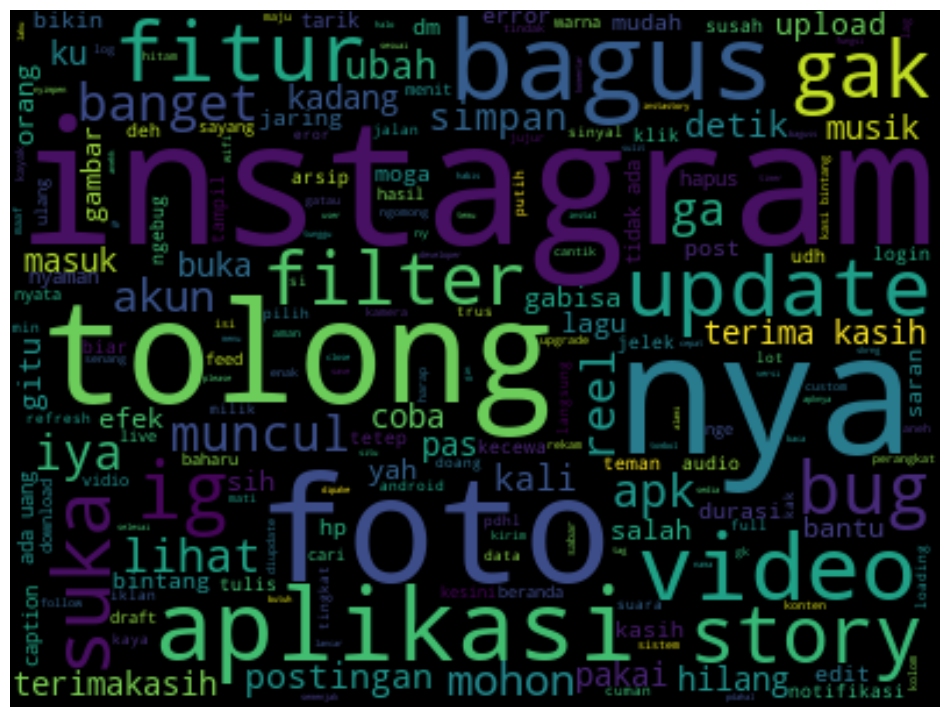

In [60]:
pos_words = ' '.join([word for word in dataset['Ready'][dataset['score']=='Positif']])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(pos_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

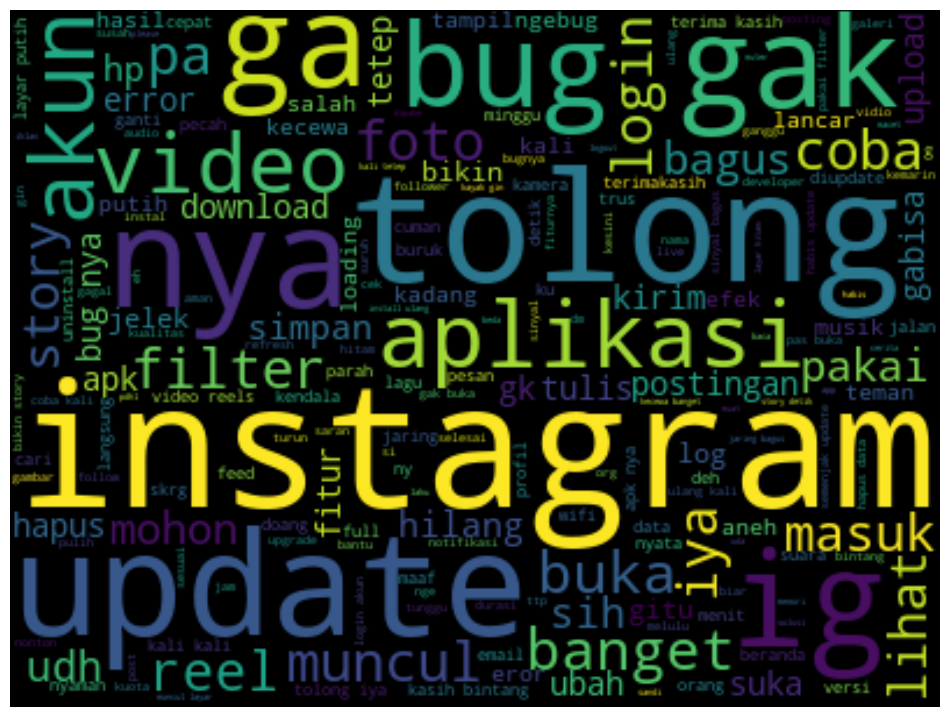

In [61]:
pos_words = ' '.join([word for word in dataset['Ready'][dataset['score']=='Negatif']])
wordcloud = WordCloud(width=400, height=300, max_font_size=100).generate(pos_words)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Modelling

In [62]:
pip install mlxtend

In [63]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics

In [64]:
def print_conf(y_test, result, classes, title='Confusion matrix'):
  conf_matrix = metrics.confusion_matrix(y_test, result)
  plt.figure(figsize=(6,6))
  sns.heatmap(conf_matrix, 
              annot=True,
              xticklabels=classes, 
              yticklabels=classes,
              cmap="Blues",
              fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.title(title)
  plt.show()

### SVM

In [65]:
from sklearn.svm import SVC

In [66]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train) #training svc model
y_pred_svc = svc.predict(X_test) # predicting test data

In [67]:
print(svc.score(X_train, y_train))
print(svc.score(X_test, y_test))

0.9512534818941504
0.8444444444444444


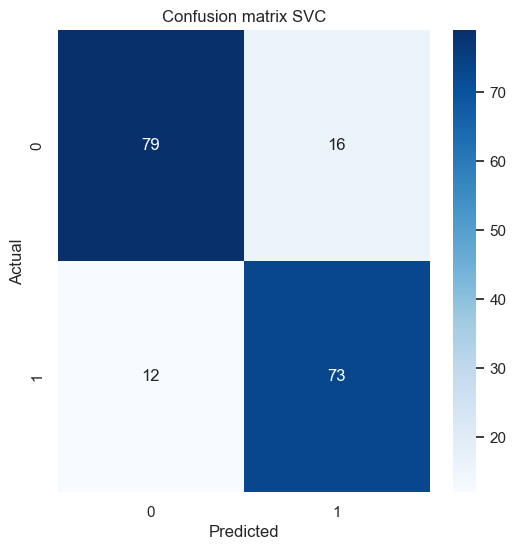

In [68]:
print_conf(y_test, y_pred_svc, [0, 1], title="Confusion matrix SVC")

# Akurasi SVC

In [69]:
print(metrics.classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

     Negatif       0.87      0.83      0.85        95
     Positif       0.82      0.86      0.84        85

    accuracy                           0.84       180
   macro avg       0.84      0.85      0.84       180
weighted avg       0.85      0.84      0.84       180



# KNN

In [70]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_knn = knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.552924791086351
0.4777777777777778


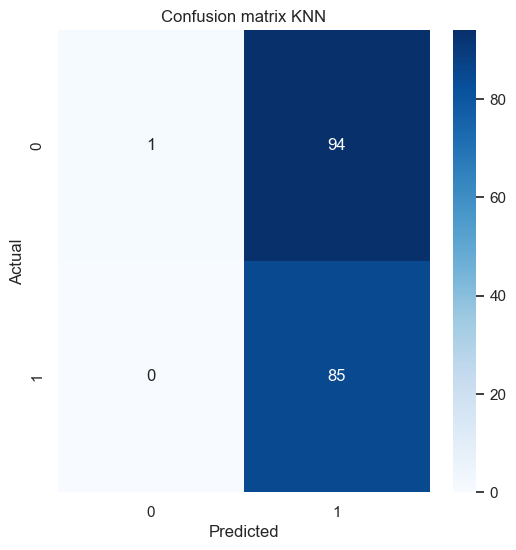

In [78]:
print_conf(y_test, y_pred_knn, [0, 1], title="Confusion matrix KNN")

In [79]:
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

     Negatif       1.00      0.01      0.02        95
     Positif       0.47      1.00      0.64        85

    accuracy                           0.48       180
   macro avg       0.74      0.51      0.33       180
weighted avg       0.75      0.48      0.32       180



## Model Comparison

In [71]:
# Accuracy Comparison
models = ['SVM', 'KNN']
accSVMC = metrics.accuracy_score(y_test,y_pred_svc)
accKNN = metrics.accuracy_score(y_test, y_pred_knn)
accuracies = [accSVMC, accKNN]
comp = pd.DataFrame(list(zip(models, accuracies)), columns=['Model', 'Accuracy'])
comp

,Model,Accuracy
0,SVM,0.844444
1,KNN,0.477778


In [72]:
import joblib

# Saving model
joblib.dump(svc, 'Instagram Classifier.joblib')
joblib.dump(tfidf_vectorizer, 'Instagram TF-IDF Vectorizer.joblib')

['Instagram TF-IDF Vectorizer.joblib']

In [73]:
df_ig['prediction'] = svc.predict(tfidf_vectorizer.transform(df_ig['content']))
df_ig['prediction'] = df_ig['prediction'].apply(lambda x: 1 if x=='Positif' else 0)

# Save new dataframe into csv file
df_ig.to_csv('Instagram Classification.csv', index=False)

df_ig.head()

,score,content,length,Case_folded,Tokenized,Stemmed,No_Slang,No_Stop,Ready,prediction
0,Negatif,Sumpah filter gw yang awalnya dibagian cerita ...,237,sumpah filter gw yang awalnya dibagian cerita ...,"['sumpah', 'filter', 'gw', 'yang', 'awalnya', ...","['sumpah', 'filter', 'saya', 'yang', 'awal', '...","['sumpah', 'filter', 'saya', 'yang', 'awal', '...","['sumpah', 'filter', 'cerita', 'pindah', 'reel...",sumpah filter cerita pindah reel foto teman te...,0
1,Negatif,Awal main instagram cuma buat nyimpen data (fo...,281,awal main instagram cuma buat nyimpen data fot...,"['awal', 'main', 'instagram', 'cuma', 'buat', ...","['awal', 'main', 'instagram', 'cuma', 'buat', ...","['awal', 'main', 'instagram', 'cuma', 'buat', ...","['main', 'instagram', 'nyimpen', 'data', 'foto...",main instagram nyimpen data foto video data ko...,0
2,Negatif,"G bisa Login ke akun awal, muncul kesalahan tr...",138,g bisa login ke akun awal muncul kesalahan trs...,"['g', 'bisa', 'login', 'ke', 'akun', 'awal', '...","['g', 'bisa', 'login', 'ke', 'akun', 'awal', '...","['g', 'bisa', 'login', 'ke', 'akun', 'awal', '...","['g', 'login', 'akun', 'muncul', 'salah', 'pdh...",g login akun muncul salah pdhl username nya sa...,0
3,Negatif,"Reel udh di update, besokannya lagu tidak ters...",210,reel udh di update besokannya lagu tidak terse...,"['reel', 'udh', 'di', 'update', 'besokannya', ...","['reel', 'udh', 'di', 'update', 'besok', 'lagu...","['reel', 'udh', 'di', 'update', 'besok', 'lagu...","['reel', 'udh', 'update', 'besok', 'lagu', 'se...",reel udh update besok lagu sedia coba instagra...,1
4,Negatif,Kecewa si...pas di update malah jadi gak bisa ...,146,kecewa si pas di update malah jadi gak bisa lo...,"['kecewa', 'si', 'pas', 'di', 'update', 'malah...","['kecewa', 'si', 'pas', 'di', 'update', 'bahka...","['kecewa', 'si', 'pas', 'di', 'update', 'bahka...","['kecewa', 'si', 'pas', 'update', 'gak', 'logi...",kecewa si pas update gak login akun gk ketemu ...,0


In [74]:
print(df_ig['score'].value_counts())
print('\n')

Negatif    449
Positif    151
Name: score, dtype: int64




In [81]:
print(df_ig['prediction'].value_counts())
print('\n')

0    439
1    161
Name: prediction, dtype: int64




## Predict New Data

In [75]:
#inputs = ['saran ig video musik anggap kena hak cipta mohon video tayang musik nya nonaktif video',
          #'main instagram nyimpen data foto video data komputer pindahin instagram eh nya banned instagramnya tuju lebih baik gak pakai instagram nge banned gak banding kecewa']
inputs = input('Masukkan text komentar = ')
inputs= [inputs]

def preProcessText(tweer):
    new_ig = []
    for tw in tweer:
        tw = case_folding(tweer)
        tw = tokenized(tw)
        tw = stemming(tw)
        tw = removeSlang(tw)
        tw = removeStopWords(tw)
        tw = ' '.join(tw)
        new_ig.append(tw)

    return new_ig

def predictNewData(ig):
    saved_model = joblib.load('Instagram Classifier.joblib') 
    saved_tfidf = joblib.load('Instagram TF-IDF Vectorizer.joblib') #???
    
    input_text = case_folding(ig)
    print(input_text)

    vectorized_ig = saved_tfidf.transform(input_text)
    print(vectorized_ig.shape)
    input_prediction = saved_model.predict(vectorized_ig)
    
    print(input_prediction)

predictNewData(inputs)

Masukkan text komentar = saran ig video musik anggap kena hak cipta mohon video tayang musik nya nonaktif video
['saran ig video musik anggap kena hak cipta mohon video tayang musik nya nonaktif video']
(1, 1742)
['Positif']


In [77]:
#inputs = ['saran ig video musik anggap kena hak cipta mohon video tayang musik nya nonaktif video',
          #'main instagram nyimpen data foto video data komputer pindahin instagram eh nya banned instagramnya tuju lebih baik gak pakai instagram nge banned gak banding kecewa']
inputs = input('Masukkan text komentar = ')
inputs= [inputs]

def preProcessText(instagram):
    new_ig = []
    for tw in tweer:
        tw = case_folding(tw)
        tw = tokenized(tw)
        tw = stemming(tw)
        tw = removeSlang(tw)
        tw = removeStopWords(tw)
        tw = ' '.join(tw)
        new_ig.append(tw)

    return new_ig

def predictNewData(ig):
    saved_model = joblib.load('Instagram Classifier.joblib') 
    saved_tfidf = joblib.load('Instagram TF-IDF Vectorizer.joblib') #???

    input_text = case_folding(ig)
    vectorized_ig = saved_tfidf.transform(input_text)
    print(vectorized_ig.shape)
    input_prediction = saved_model.predict(vectorized_ig)
    
    for i in range(len(inputs)):
        if inputs[i]==1:
            print('\nPrediksi Komentar :',input_prediction[i])
        else:
            print('\nPrediksi Komentar :',input_prediction[i])

predictNewData(inputs)

Masukkan text komentar = main instagram nyimpen data foto video data komputer pindahin instagram eh nya banned instagramnya tuju lebih baik gak pakai instagram nge banned gak banding kecewa
(1, 1742)

Prediksi Komentar : Negatif


In [80]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: streamlit in c:\users\acer\anaconda3\lib\site-packages (1.17.0)

